<a href="https://colab.research.google.com/github/srinijalanda93/ComputerVision/blob/main/lab10_2448526_cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
1. Load the image which contain different shapes (square, circle, rectangle etc.) and
apply any edge detection methods (Built in &amp; User defined function) to detect the
edges horizontally, vertically and both the directions. (2 M)
2. Identify the boundary of the largest object. (2 M)
3. Compute the four directional Chain Code representing the boundary.
4. compute a simple shape descriptor:
5. Classifying objects by shape (e.g., round, square, triangular).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

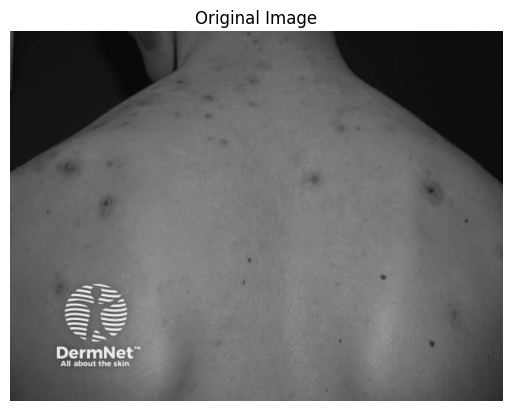

In [3]:
img = cv2.imread('/content/148.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


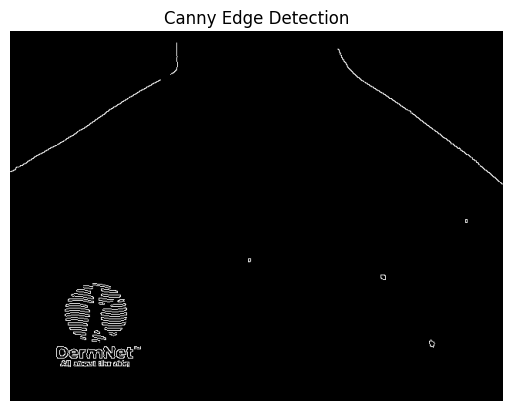

In [4]:
edges_canny = cv2.Canny(img, 100, 200)

plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


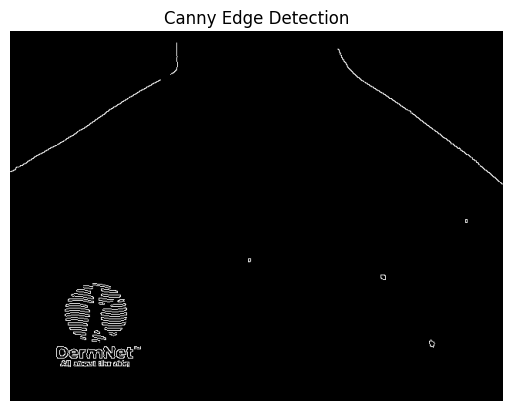

In [5]:
edges_canny = cv2.Canny(img, 100, 200)

plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


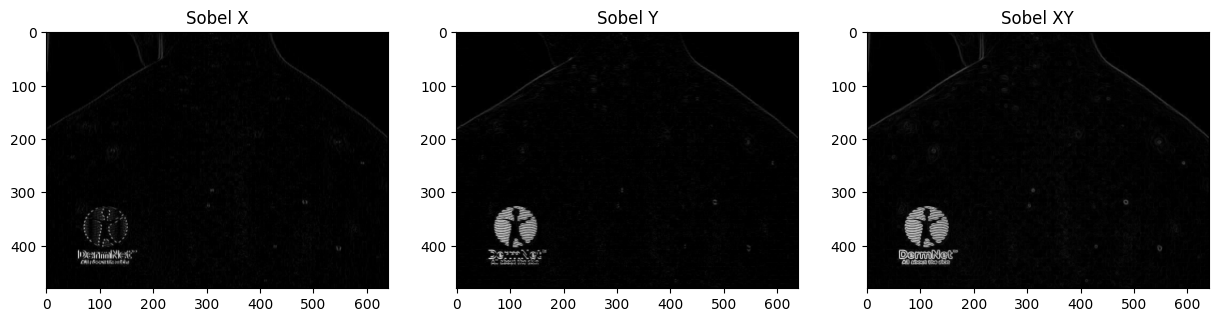

In [7]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobelxy = cv2.magnitude(sobelx, sobely)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1), plt.imshow(np.abs(sobelx), cmap='gray'), plt.title('Sobel X')
plt.subplot(1, 3, 2), plt.imshow(np.abs(sobely), cmap='gray'), plt.title('Sobel Y')
plt.subplot(1, 3, 3), plt.imshow(sobelxy, cmap='gray'), plt.title('Sobel XY')
plt.show()


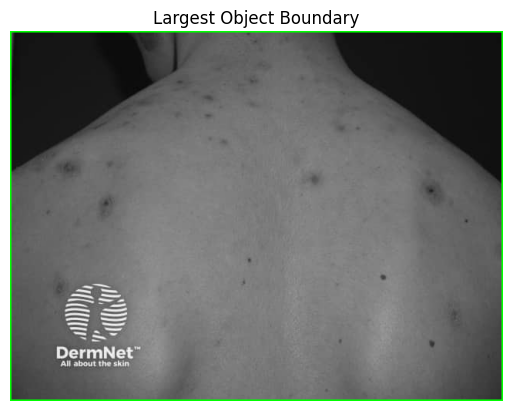

In [8]:
# Threshold image
_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Draw it
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, [largest_contour], -1, (0, 255, 0), 2)

plt.imshow(output)
plt.title('Largest Object Boundary')
plt.axis('off')
plt.show()


In [9]:
def chain_code(contour):
    directions = [(1,0), (0,1), (-1,0), (0,-1)]  # right, down, left, up
    chain = []
    for i in range(1, len(contour)):
        dx = contour[i][0][0] - contour[i-1][0][0]
        dy = contour[i][0][1] - contour[i-1][0][1]
        for idx, (x, y) in enumerate(directions):
            if (dx, dy) == (x, y):
                chain.append(idx)
                break
    return chain

code = chain_code(largest_contour)
print("Chain Code (first 50 values):", code[:50])


Chain Code (first 50 values): []
